In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df=pd.read_excel("/home/user/Desktop/env2/VAR/Libor_sofr_org_value_adjusted.xlsx")

In [3]:
df=df[['Date','LIBOR ON','SOFR Index']]
df.fillna(method='ffill',inplace=True)
df.index=df['Date']
df.isnull().sum()

Date          0
LIBOR ON      0
SOFR Index    0
dtype: int64

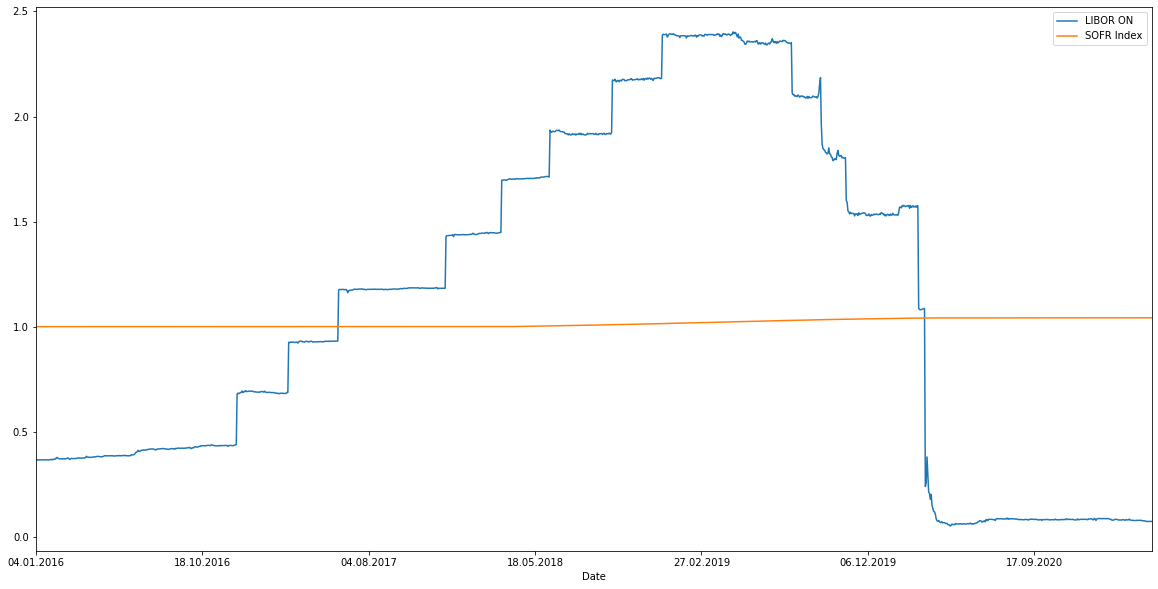

In [4]:
plt.figure(figsize=(20,10))
df['LIBOR ON'].plot(legend=True)
df['SOFR Index'].plot(legend=True)
plt.show()

In [5]:
def MACD(df,slow=26,fast=12,signal=9,colname=None):
    if colname==None:
        print("colnam")
        df=df.copy()
        df["ema_slow"]=df["ON"].ewm(slow).mean()
        df["ema_fast"]=df["ON"].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    else:
        df=df.copy()
        df["ema_slow"]=df[colname].ewm(slow).mean()
        df["ema_fast"]=df[colname].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    return df

In [6]:
df["LIBOR ON Norm"]=(df["LIBOR ON"]-df["LIBOR ON"].min())/(df["LIBOR ON"].max()-df["LIBOR ON"].min())

In [7]:
df["SOFR Index Norm"]=(df["SOFR Index"]-df["SOFR Index"].min())/(df["SOFR Index"].max()-df["SOFR Index"].min())

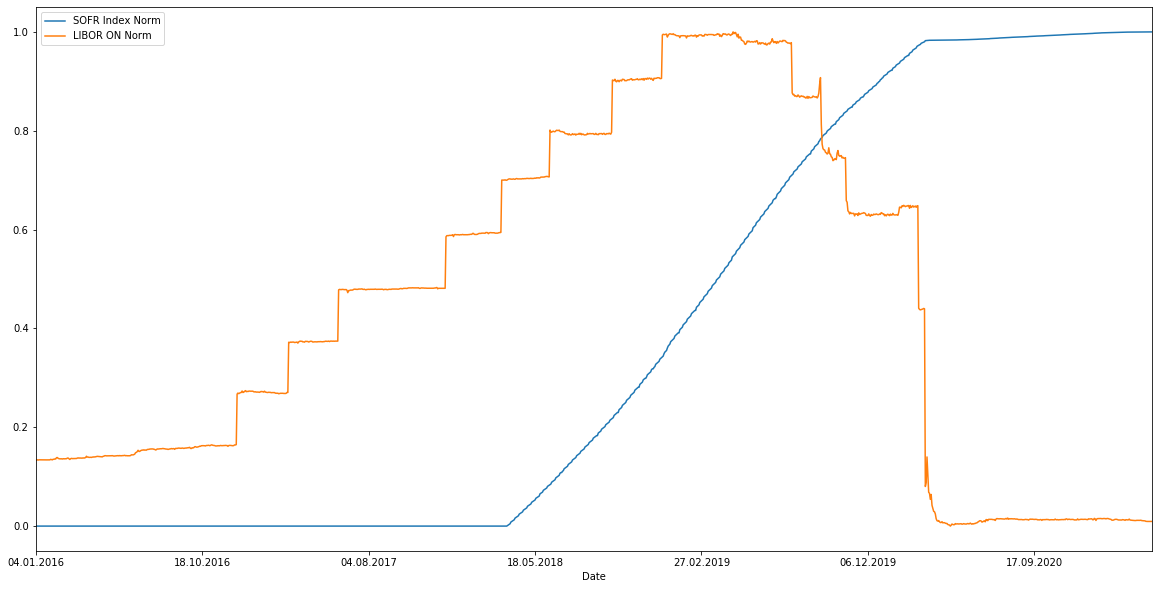

In [8]:
plt.figure(figsize=(20,10))
df["SOFR Index Norm"].plot(legend=True)
df["LIBOR ON Norm"].plot(legend=True)
plt.show()

In [9]:
df=MACD(df,colname="LIBOR ON Norm")
SOFR=MACD(df,colname="SOFR Index Norm")

In [10]:
df["SOFR"]=SOFR["signal"]
df["LIBOR"]=df["signal"]

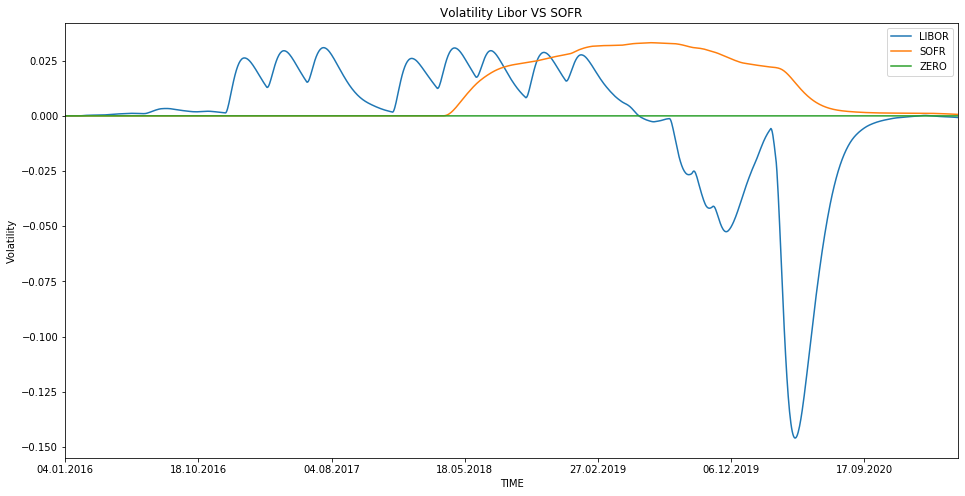

In [11]:
plt.figure(figsize=(16,8))
df["ZERO"]=0
df["LIBOR"].plot(legend=True)
df["SOFR"].plot(legend=True)
df["ZERO"].plot(legend=True)
plt.xlabel("TIME")
plt.ylabel("Volatility")
plt.title("Volatility Libor VS SOFR")
plt.show()

In [12]:
def variance(data):
# Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance,math.sqrt(variance)

In [13]:
variance(df["LIBOR ON"])

(0.6588654963891654, 0.8117053014420722)

In [14]:
variance(df["SOFR Index"])

(0.0003126573205930722, 0.01768211866810853)

In [15]:
df["%changeLIBOR"]=df["LIBOR ON Norm"].pct_change().rolling(20).std()*(252**0.5)
df["%changeSOFR"]=SOFR["SOFR Index Norm"].pct_change().rolling(20).std()*(252**0.5)

[]

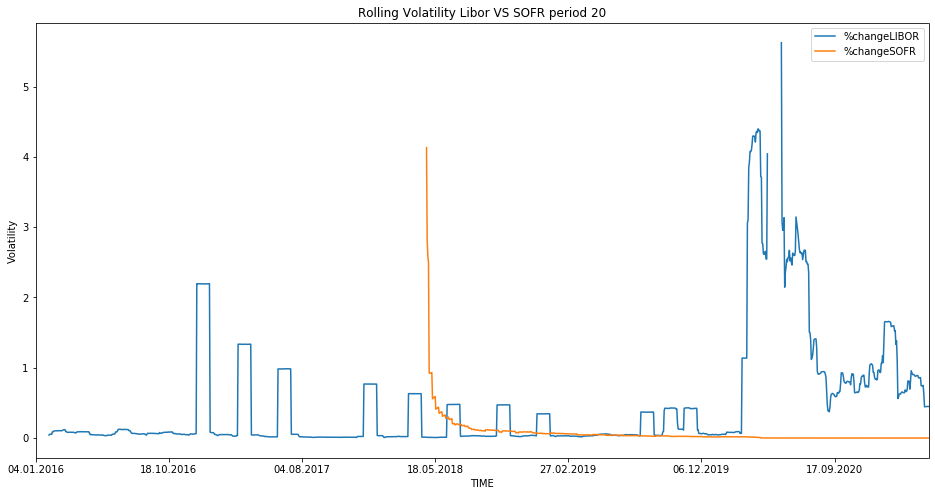

In [16]:
plt.figure(figsize=(16,8))
df["%changeLIBOR"].plot(legend=True)
df["%changeSOFR"].plot(legend=True)
plt.xlabel("TIME")
plt.ylabel("Volatility")
plt.title("Rolling Volatility Libor VS SOFR period 20")
plt.plot()